## Data Reading and Preprocessing:

In [290]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [291]:
# Reading data from the CSV file
df = pd.read_csv("job.csv")

# Replacing synonyms in each cell of the "found_technologies" list
df["found_technologies"] = df["found_technologies"].apply(
    lambda x: [
        tech.replace("ML", "Machine learning").replace("JS", "JavaScript")
        for tech in x.split(",")
    ]
)
df

,title,salary,company,location,views,applications,found_technologies,experience
0,"Python Engineer (Poland, Romania)",6500.0,Adaptiq,"Румунія,Польща",2,1,"[Python, Django, SQL, API, Docker, AWS, Machin...",5
1,Junior/Middle Python Developer,NaN,Energise,Україна,258,115,"[Python, SQL, PostgreSQL, Git, REST, API, CI/CD]",0
2,Strong Junior Python Developer,500.0,MB Digital,Україна,146,76,"[Python, Django, SQL, PostgreSQL, Git, REST, A...",1
3,Middle Python Developer (hybrid),2500.0,VeryBusy Recruiting,Україна,6,1,"[Python, Django, API, Docker, AWS, DRF, Docker...",2
4,Python Developer,NaN,Luxoft,Україна,11,1,"[Python, Git, REST, API, AWS, OOP, Graphql, OR...",5
...,...,...,...,...,...,...,...,...
204,Software Engineer with VoIP experience,NaN,Respeecher,Україна,65,4,"[Python, API, Machine learning, Machine learn...",5
205,Python Engineer (OCR and Document Processing),900.0,PLANEKS,Україна,173,20,"[Python, SQL, Git, REST, ORM]",2
206,Python developer на платформі Odoo,NaN,Aurelis Software,Україна,32,3,"[Python, JavaScript, HTMachine learning, CSS, ...",2
207,Senior Python Software Engineer with Data Scie...,NaN,Binariks,Україна,19,1,"[Python, ORM, Spark]",5


## Statistics

In [292]:
df[["views", "applications", "experience", "salary"]].describe()

,views,applications,experience,salary
count,209.000000,209.000000,209.000000,66.000000
mean,125.296651,28.492823,3.330144,2863.030303
std,157.625036,48.307620,1.506748,2144.780405
min,0.000000,0.000000,0.000000,350.000000
25%,40.000000,4.000000,2.000000,900.000000
50%,70.000000,10.000000,3.000000,2500.000000
75%,139.000000,28.000000,5.000000,3875.000000
max,911.000000,259.000000,5.000000,7560.000000


## Correlations

In [293]:
# Applying one-hot encoding to the "found_technologies" column
technologies_df = df["found_technologies"].str.join("|").str.get_dummies()

# Merging the resulting data with the main DataFrame
df_encoded = pd.concat([df, technologies_df], axis=1)
numerical_columns = df_encoded.select_dtypes(include=["int64", "float64"]).columns

# Correlation with numerical columns
correlation_matrix = df_encoded[numerical_columns].corr()
correlation_matrix


,salary,views,applications,experience,Machine learning,API,AWS,AWS Lambda,Agile,Algorithms,...,Serverless,Shell scripting,Spark,Swagger,TensorFlow,Terraform,Vue.js,Websockets,XMachine learning,pytest
salary,1.000000,-0.538643,-0.515954,0.862658,0.029016,-0.170779,0.167198,NaN,0.095003,-0.015916,...,0.489207,NaN,0.153667,0.037119,-0.088803,0.099479,0.198246,0.052903,-0.140197,-0.117906
views,-0.538643,1.000000,0.926158,-0.628529,-0.065011,-0.014903,-0.281702,-0.080743,-0.201072,-0.083735,...,-0.160557,-0.024383,-0.107195,-0.022008,-0.035324,-0.082932,0.013160,-0.053062,0.087318,0.046159
applications,-0.515954,0.926158,1.000000,-0.584355,-0.077863,0.020812,-0.294459,-0.088738,-0.189093,-0.075278,...,-0.136974,-0.022291,-0.109645,-0.030892,-0.073751,-0.076773,0.033321,-0.039934,0.022439,0.077551
experience,0.862658,-0.628529,-0.584355,1.000000,0.097670,-0.079359,0.248279,-0.015231,0.171417,0.190625,...,0.144872,-0.061358,0.123670,0.000365,0.080637,0.086025,-0.037760,0.090598,-0.201030,-0.098071
Machine learning,0.029016,-0.065011,-0.077863,0.097670,1.000000,-0.102582,-0.013234,-0.063122,-0.034502,0.355064,...,-0.079730,-0.020632,0.453239,-0.051157,0.496735,0.039522,-0.051157,0.067959,-0.046585,-0.014926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Terraform,0.099479,-0.082932,-0.076773,0.086025,0.039522,0.124292,0.266851,-0.063122,-0.034502,-0.010237,...,-0.079730,0.233021,0.001800,0.158485,-0.107175,1.000000,-0.051157,-0.046585,-0.046585,0.120704
Vue.js,0.198246,0.013160,0.033321,-0.037760,-0.051157,0.053606,-0.054845,-0.036470,-0.092602,-0.066218,...,-0.046065,-0.011921,-0.042431,0.142036,-0.061922,-0.051157,1.000000,-0.026915,-0.026915,-0.047805
Websockets,0.052903,-0.053062,-0.039934,0.090598,0.067959,0.105183,-0.091696,-0.033211,-0.084326,0.033053,...,-0.041949,-0.010855,-0.038639,-0.026915,-0.056388,-0.046585,-0.026915,1.000000,-0.024510,-0.043533
XMachine learning,-0.140197,0.087318,0.022439,-0.201030,-0.046585,-0.030099,-0.029067,-0.033211,-0.084326,-0.060300,...,-0.041949,-0.010855,-0.038639,-0.026915,-0.056388,-0.046585,-0.026915,-0.024510,1.000000,-0.043533


## Counting Technology Mentions:

In [294]:
# Combining all technology lists into one list
all_technologies = [tech for sublist in df["found_technologies"] for tech in sublist]

# Counting the frequency of each technology mention
technologies_frequency = pd.Series(all_technologies).value_counts()

# Creating a DataFrame from the frequency of technology mentions
df_technologies = pd.DataFrame(
    {
        "Technology": technologies_frequency.index,
        "Frequency": technologies_frequency.values,
    }
)
df_technologies


,Technology,Frequency
0,Python,208
1,ORM,160
2,API,144
3,SQL,121
4,AWS,103
...,...,...
64,Beautiful Soup,1
65,Chef,1
66,Micro service,1
67,Firebase,1


## Data Visualization:

### Technology Frequency:

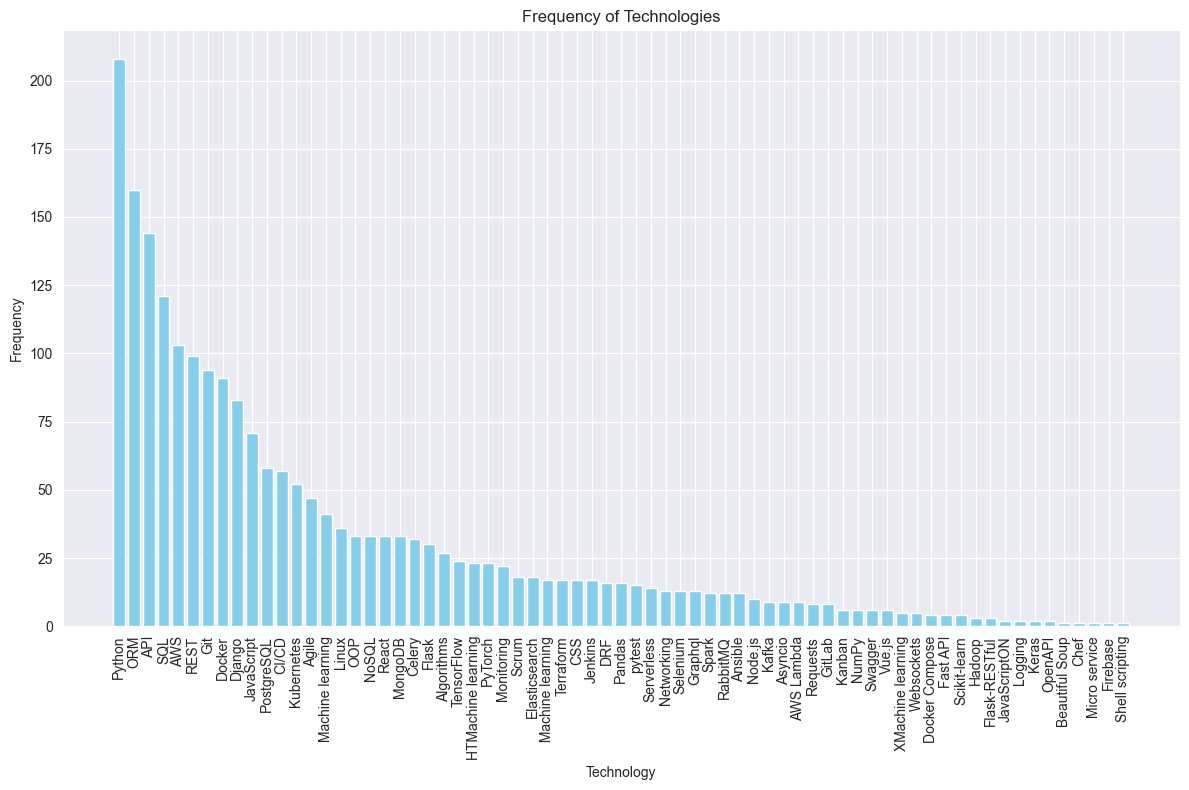

In [295]:
# Creating a bar chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(df_technologies["Technology"], df_technologies["Frequency"], color="skyblue")
ax.set_xlabel("Technology")
ax.set_ylabel("Frequency")
ax.set_title("Frequency of Technologies")
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.tight_layout()


### Save Technology Frequency diagram:


In [279]:
# Getting the current date and time
current_datetime = datetime.now()

# Converting date and time to a string for use in the file name
current_datetime_str = current_datetime.strftime("%Y-%m-%d_%H-%M-%S")

# Saving the chart with the current date and time in the file name
path = f"diagrams/frequency_technologies_{current_datetime_str}.png"
fig.savefig(path)

### Location Frequency:

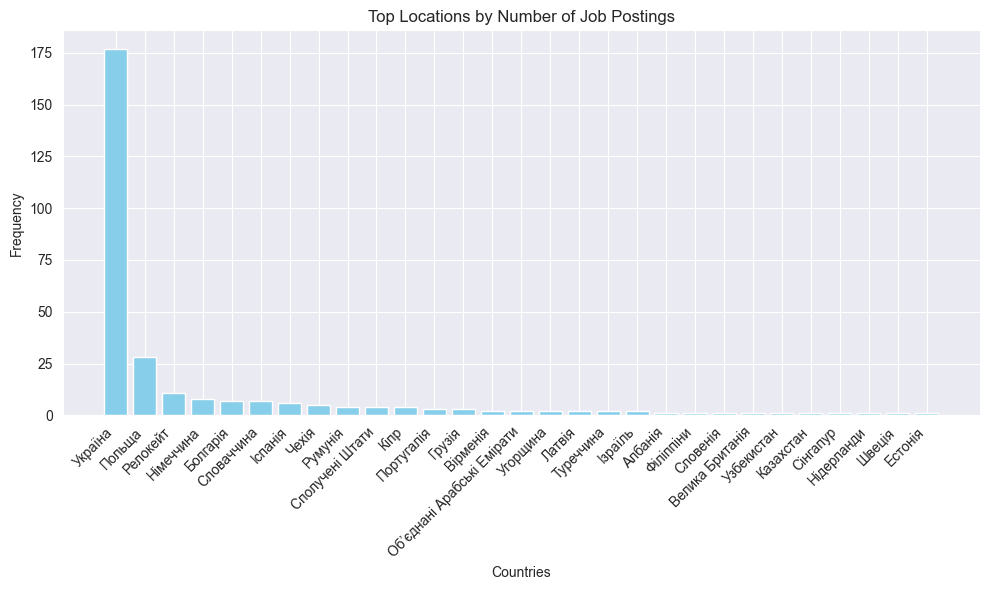

In [296]:
locations =[item for location in df["location"].str.split(",") for item in location]

job_count = pd.Series(locations).value_counts()

# Creating a DataFrame from the frequency of location mentions
df_countries = pd.DataFrame(
    {
        "Countries": job_count.index,
        "Frequency": job_count.values,
    }
)


plt.figure(figsize=(10, 6))
plt.bar(df_countries["Countries"], df_countries["Frequency"], color="skyblue")
plt.xlabel("Countries")
plt.ylabel("Frequency")
plt.title("Top Locations by Number of Job Postings")
plt.xticks(rotation=45, ha="right") # Rotating x-axis labels for better readability
plt.tight_layout()
fig = plt.gcf()


### Save Location Frequency diagram:


In [281]:
# Getting the current date and time
current_datetime = datetime.now()

# Converting date and time to a string for use in the file name
current_datetime_str = current_datetime.strftime("%Y-%m-%d_%H-%M-%S")

# Saving the chart with the current date and time in the file name
path = f"diagrams/frequency_locations_{current_datetime_str}.png"
fig.savefig(path)

### Correlation Heatmap:

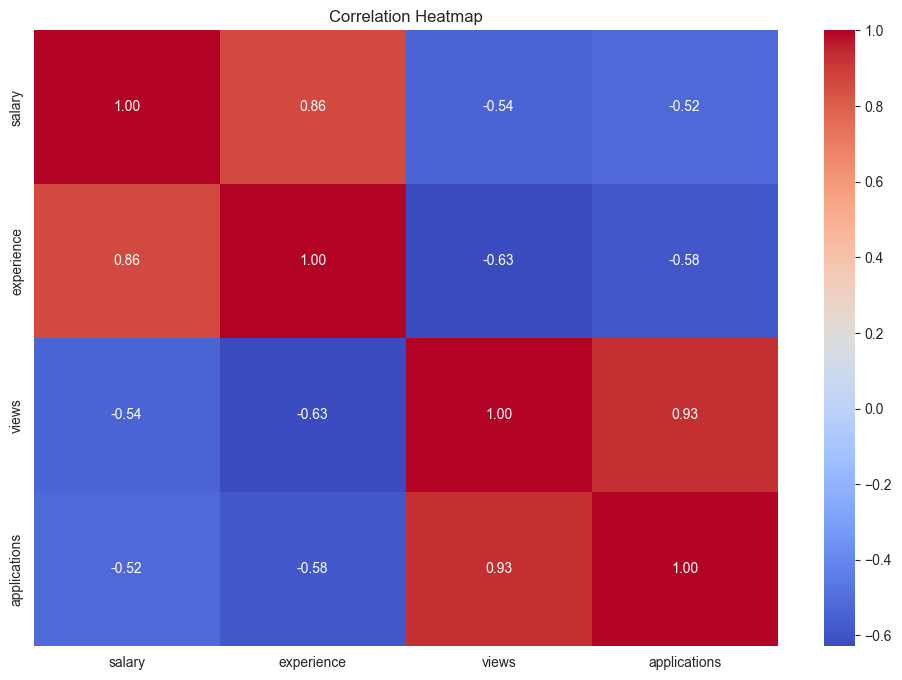

In [297]:
selected_columns = ["salary", "experience", "views", "applications"]

# Creating a new DataFrame with only selected columns
selected_df = df[selected_columns]

# Calculating correlation for the selected columns
correlation_matrix_selected = selected_df.corr()

# Creating a heatmap for the selected correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
fig = plt.gcf()
plt.show()

### Save Correlation Heatmap:


In [283]:
# Getting the current date and time
current_datetime = datetime.now()

# Converting date and time to a string for use in the file name
current_datetime_str = current_datetime.strftime("%Y-%m-%d_%H-%M-%S")

# Saving the chart with the current date and time in the file name
path = f"diagrams/сorrelation_heatmap_{current_datetime_str}.png"
fig.savefig(path)

### Number of vacancies based on experience:

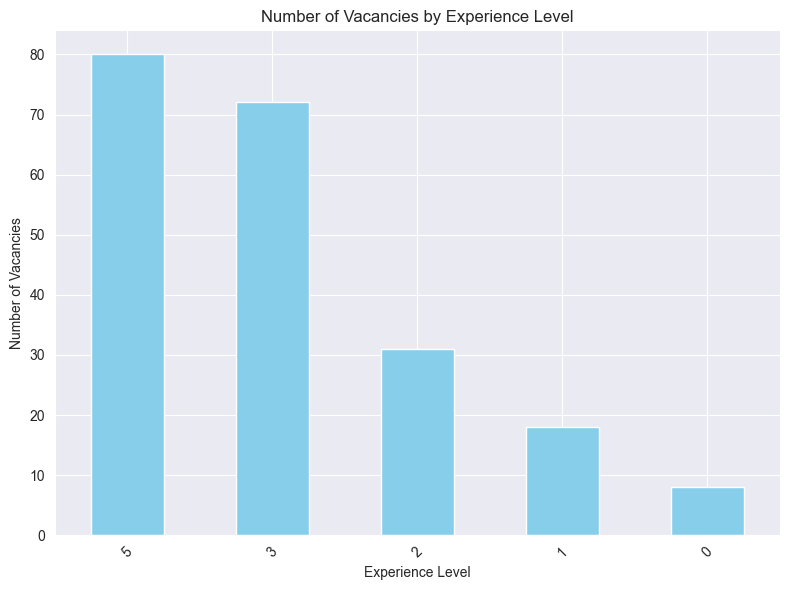

In [298]:
# Counting the number of vacancies by experience level
vacancies_by_experience = df["experience"].value_counts()

# Creating a diagram
plt.figure(figsize=(8, 6))
vacancies_by_experience.plot(kind="bar", color="skyblue")
plt.xlabel("Experience Level")
plt.ylabel("Number of Vacancies")
plt.title("Number of Vacancies by Experience Level")
plt.xticks(rotation=45)  # Rotating labels for better readability
plt.tight_layout()
fig = plt.gcf()
# Displaying the diagram
plt.show()

### Save Diagram Number of vacancies based on experience

In [285]:
# Getting the current date and time
current_datetime = datetime.now()

# Converting date and time to a string for use in the file name
current_datetime_str = current_datetime.strftime("%Y-%m-%d_%H-%M-%S")

# Saving the chart with the current date and time in the file name
path = f"diagrams/vacancies_by_experience_{current_datetime_str}.png"
fig.savefig(path)

### Number of Vacancies by Salary Range 

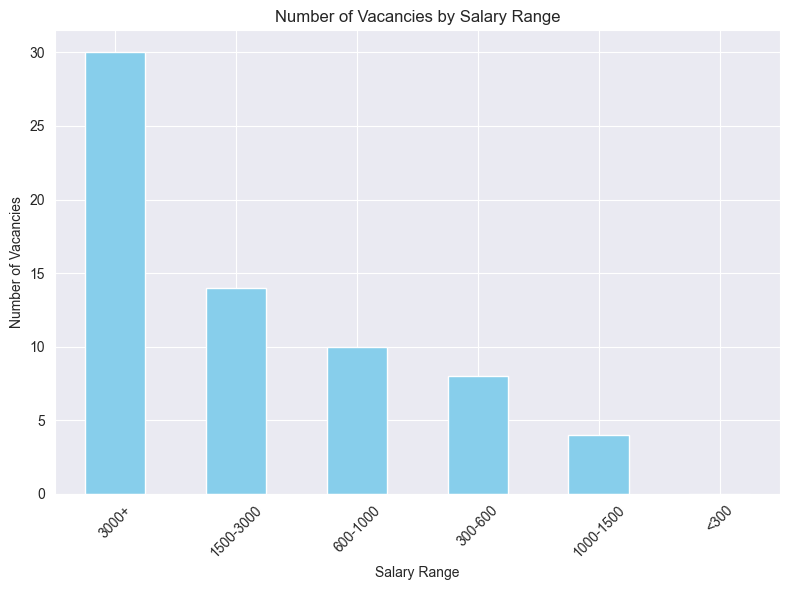

In [299]:
# Creating salary intervals
bins = [0, 300, 600, 1000, 1500, 3000, float("inf")]
labels = ["<300", "300-600", "600-1000", "1000-1500", "1500-3000", "3000+"]

# Adding a column with salary categories to the DataFrame
df["salary_range"] = pd.cut(df["salary"], bins=bins, labels=labels, right=False)

# Counting the number of vacancies in each salary category
vacancies_by_salary_range = df["salary_range"].value_counts()

# Creating a bar chart
plt.figure(figsize=(8, 6))
vacancies_by_salary_range.plot(kind="bar", color="skyblue")
plt.xlabel("Salary Range")
plt.ylabel("Number of Vacancies")
plt.title("Number of Vacancies by Salary Range")
plt.xticks(rotation=45)  # Rotating labels for better readability
plt.tight_layout()
fig = plt.gcf()

# Displaying the chart
plt.show()


### Save Diagram Number of Vacancies by Salary Range

In [300]:
# Getting the current date and time
current_datetime = datetime.now()

# Converting date and time to a string for use in the file name
current_datetime_str = current_datetime.strftime("%Y-%m-%d_%H-%M-%S")

# Saving the chart with the current date and time in the file name
path = f"diagrams/vacancies_by_salary_{current_datetime_str}.png"
fig.savefig(path)

## Companies by Number of Vacancies

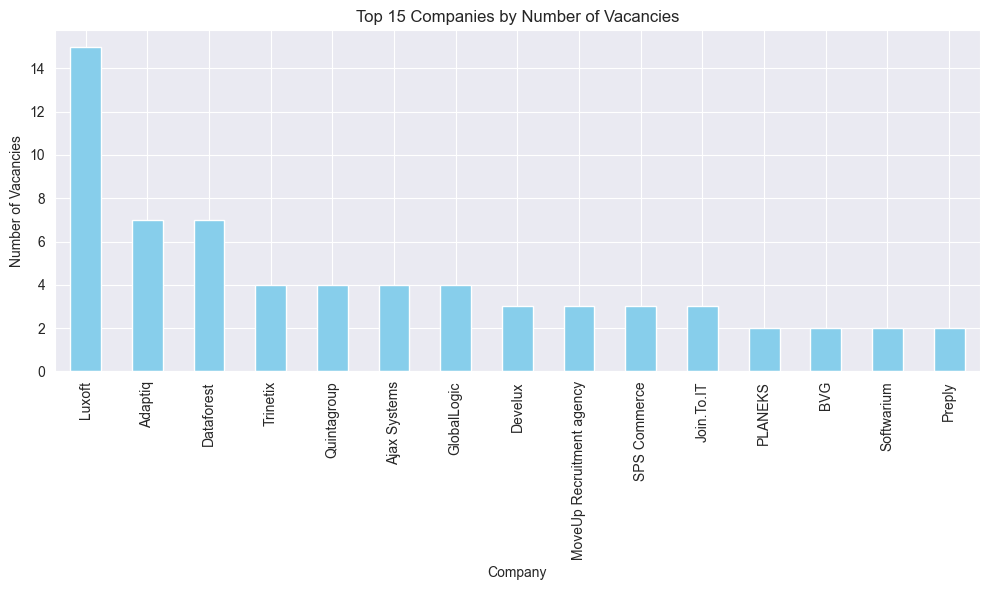

In [301]:
# Counting the number of vacancies in each company
vacancies_by_company = df["company"].value_counts().head(15)

# Creating a bar chart
plt.figure(figsize=(10, 6))
vacancies_by_company.plot(kind="bar", color="skyblue")
plt.xlabel("Company")
plt.ylabel("Number of Vacancies")
plt.title("Top 15 Companies by Number of Vacancies")
plt.xticks(rotation=90)  # Rotating labels for better readability
plt.tight_layout()
fig = plt.gcf()
# Displaying the chart
plt.show()


## Save Diagram Companies by Number of Vacancies

In [289]:
# Getting the current date and time
current_datetime = datetime.now()

# Converting date and time to a string for use in the file name
current_datetime_str = current_datetime.strftime("%Y-%m-%d_%H-%M-%S")

# Saving the chart with the current date and time in the file name
path = f"diagrams/vacancies_by_company_{current_datetime_str}.png"
fig.savefig(path)